A car manufacturer known for making large automobiles is struggling with sales and has asked for your help in designing an energy efficient car. Using data gathered, determine which attributes may contribute to higher gas mileage so that they can design a more fuel efficient automobile.

Part 1:

Use proper data cleansing techniques to ensure that you have the highest quality data to model this problem. Detail your process and discuss the decisions you made to clean the data.

Part 2:

Build a linear regression model to accurately predict miles per gallon (MPG) based on the attributes of a vehicle. Discuss the significant attributes and how they can help you build the proper car.

Part 3:

Optimize the model using selection techniques, explain whether the model can achieve the specified goals, and describe which attributes contribute to higher MPG over others.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

root_path = '/content/car.csv'  #change dir to your project folder


Mounted at /content/drive


In [3]:
# Importing libraries 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV,RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mpl_toolkits.mplot3d import axes3d
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
!pip install mlxtend==0.17.3
from mlxtend.feature_selection import SequentialFeatureSelector

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [4]:
# Loading the dataset
df=pd.read_csv('car.csv')
df.head()
# US Made attribute is a categorical variable identified with the class labels, '0' and '1'. 
# '1' implies that the car is made in the US, while '0' implies that the car is not made in the US. 

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


**Data Preprocessing**

Part 1:

Use proper data cleansing techniques to ensure that you have the highest quality data to model this problem. Detail your process and discuss the decisions you made to clean the data.

In [5]:
# Calculate missing rates
missing_rates = df.isna().mean()
print(missing_rates)

MPG             0.0
Cylinders       0.0
Displacement    0.0
Horsepower      0.0
Weight          0.0
Acceleration    0.0
Model Year      0.0
US Made         0.0
dtype: float64


In [6]:
# Identifyin columns type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [7]:
# Checking data for null values 
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [8]:
#Descriptive Statistics
df.describe() 

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000


In [9]:
# Converting attribute "US Made" into categorical variable
df["US Made"] = df["US Made"].astype("category")

In [10]:
# Classifying attributes into categorical and numerical variables 
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Horsepower']
['MPG', 'Cylinders', 'Displacement', 'Weight', 'Acceleration', 'Model Year', 'US Made']


In [11]:
# Checking for non text values 
for variable in cat:
    print(variable,":", sum(df[variable] == '?')) #Identified Horsepower to have 6 non text values 

Horsepower : 6


In [12]:
# Replacing NAN and ? values in the dataset for Horsepower and converting to float
df.Horsepower = df.Horsepower.str.replace('?','NaN').astype(float)
df.Horsepower.fillna(df.Horsepower.median(),inplace=True)
df.Horsepower = df.Horsepower.astype(float) 

In [13]:
# Checking data for ? and NAN values 
for variable in cat:
    print(variable,":", sum(df[variable] == '?'))

Horsepower : 0


In [14]:
# Checking for outlier

def calculate_outlier_percentage(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr

    outliers = column[(column < lower_fence) | (column > upper_fence)]
    outlier_percentage = (len(outliers) / len(column)) * 100

    return outlier_percentage

outlier_percentages = {}

for column in df.columns:
    if df[column].dtype in [np.int64, np.float64]:
        outlier_percentages[column] = calculate_outlier_percentage(df[column])

print("Outlier Percentages:")
for column, percentage in outlier_percentages.items():
    print(f"{column}: {percentage}%")

Outlier Percentages:
MPG: 0.25125628140703515%
Cylinders: 0.0%
Displacement: 0.0%
Horsepower: 2.763819095477387%
Weight: 0.0%
Acceleration: 1.7587939698492463%
Model Year: 0.0%


**Visualisations**

<Axes: >

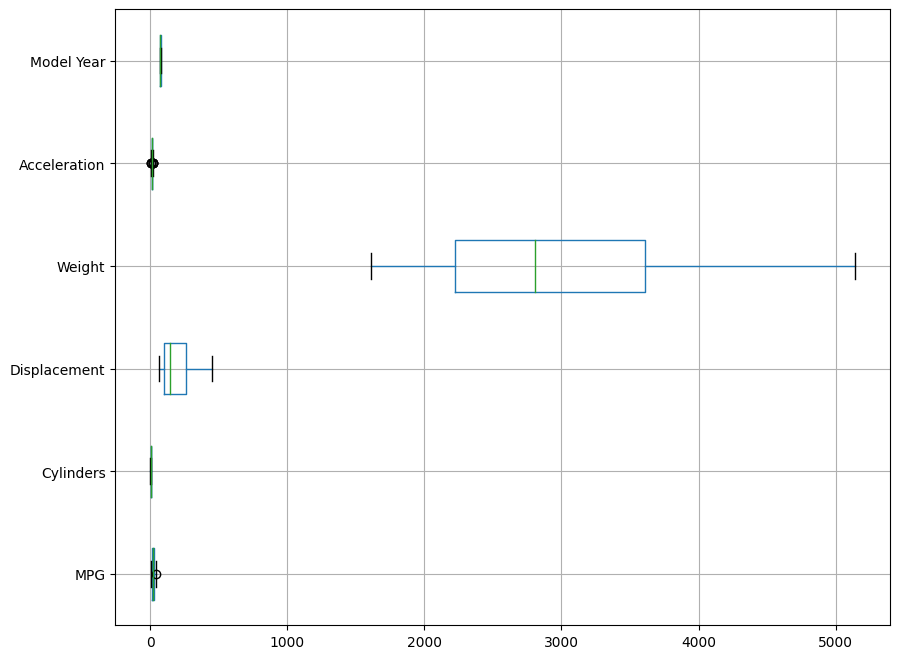

In [15]:
# Identifying outlier using boxplot
plt.figure(figsize=(10,8))
df[num].boxplot(vert=0)

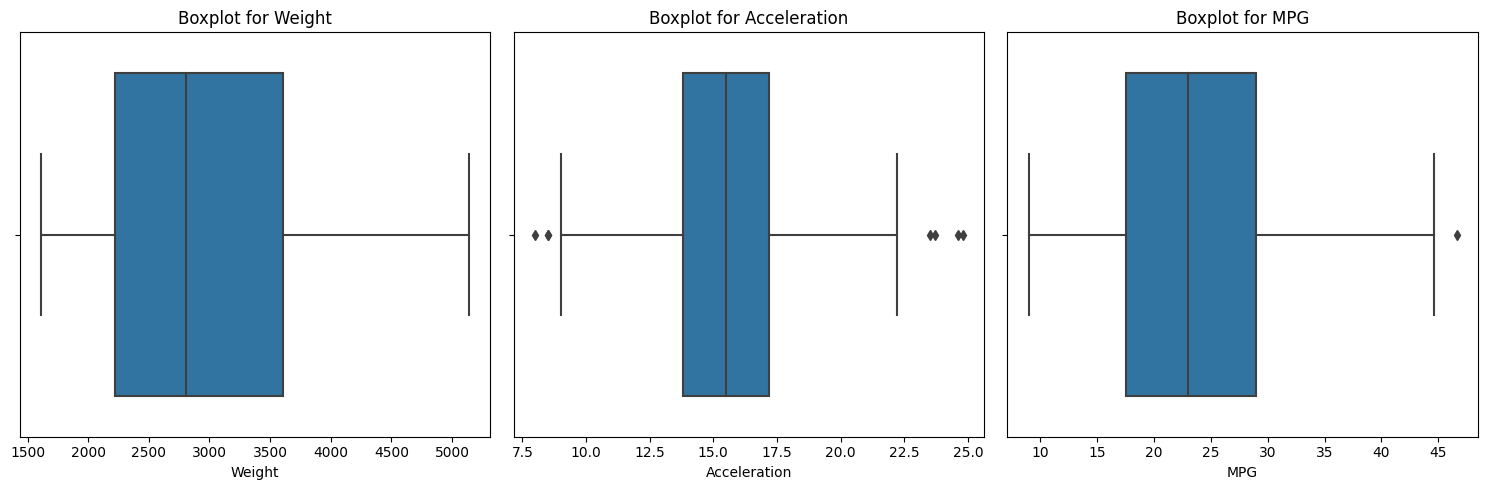

In [16]:
# Create a figure and axis objects
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Plot the boxplot for 'Weight' 
sns.boxplot(x=df['Weight'], ax=ax[0])
ax[0].set_title('Boxplot for Weight')

# Plot the boxplot for 'Acceleration' 
sns.boxplot(x=df['Acceleration'], ax=ax[1])
ax[1].set_title('Boxplot for Acceleration')

# Plot the boxplot for 'MPG' 
sns.boxplot(x=df['MPG'], ax=ax[2])
ax[2].set_title('Boxplot for MPG')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
# Calculated  the lower and upper range for treating outliers in a given column (col) using the Interquartile Range (IQR) method
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR) ##Specifying lower range for treating outliers
    upper_range= Q3+(1.5 * IQR) ##Specifying upper range for treating outliers
    return lower_range, upper_range    

In [18]:
lower_range,upper_range=remove_outlier(df['Acceleration'])
df['Acceleration']=np.where(df['Acceleration']>upper_range,upper_range,df['Acceleration'])
df['Acceleration']=np.where(df['Acceleration']<lower_range,lower_range,df['Acceleration'])

In [19]:
lower_range,upper_range=remove_outlier(df['MPG'])
df['MPG']=np.where(df['MPG']>upper_range,upper_range,df['MPG'])
df['MPG']=np.where(df['MPG']<lower_range,lower_range,df['MPG'])

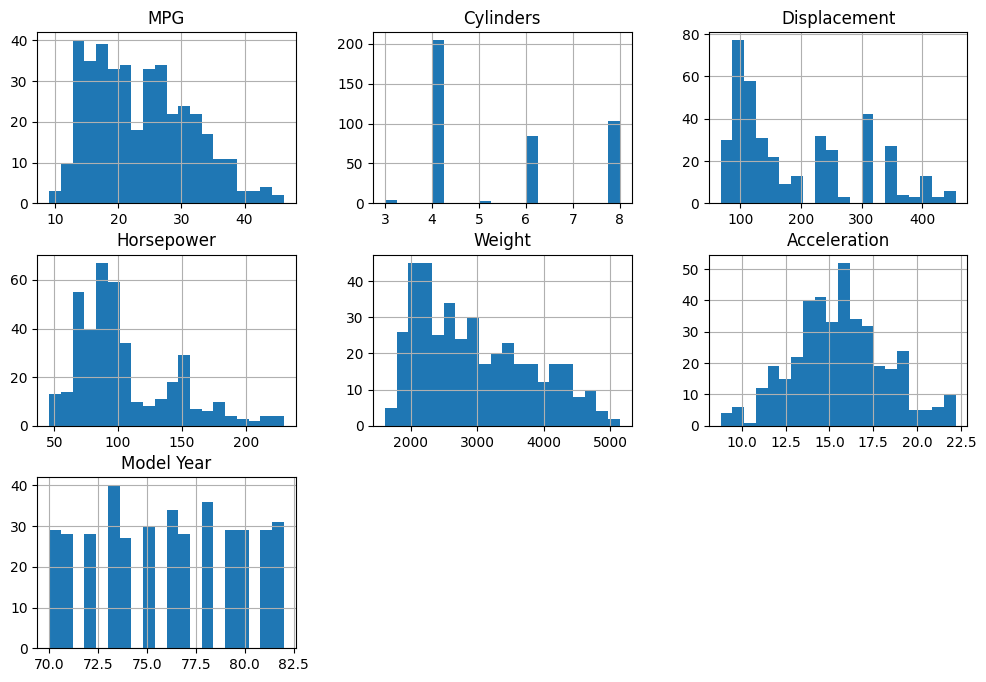

In [20]:
# Observe the distribution of all attributes  in the dataset
df.hist(figsize=(12,8),bins=20)
plt.show()

**Correlation Analysis**

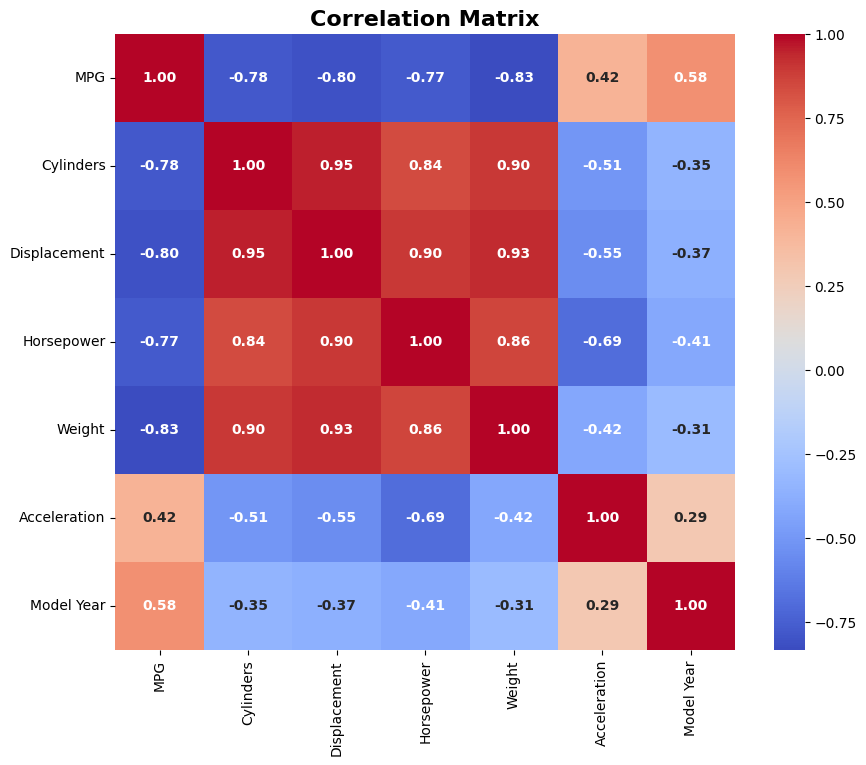

In [21]:
# Define graph size 
plt.figure(figsize=(10, 8))

# Generate correlation matrix
corr_matrix = df.corr()

cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create heatmap with bold annotations
sns.heatmap(corr_matrix, annot=True, fmt=".2f", annot_kws={"weight": "bold"}, cmap=cmap)

plt.title("Correlation Matrix", fontsize=16, fontweight='bold')

# Show the plot
plt.show()





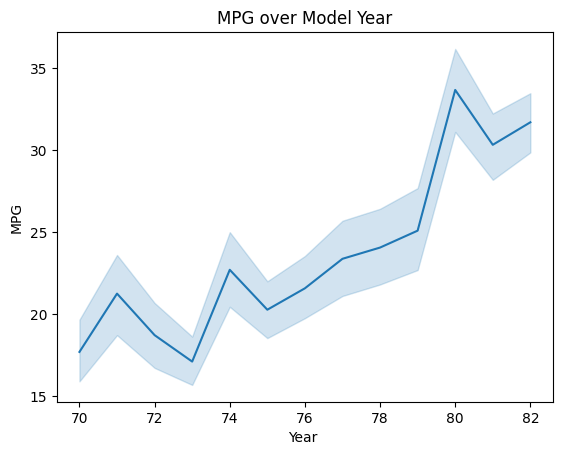

In [22]:
# Analysis for Model Per Year with corresponding MPG 
sns.lineplot(x='Model Year', y='MPG', data=df)
plt.xlabel('Year ')
plt.ylabel('MPG')
plt.title('MPG over Model Year')
plt.show()

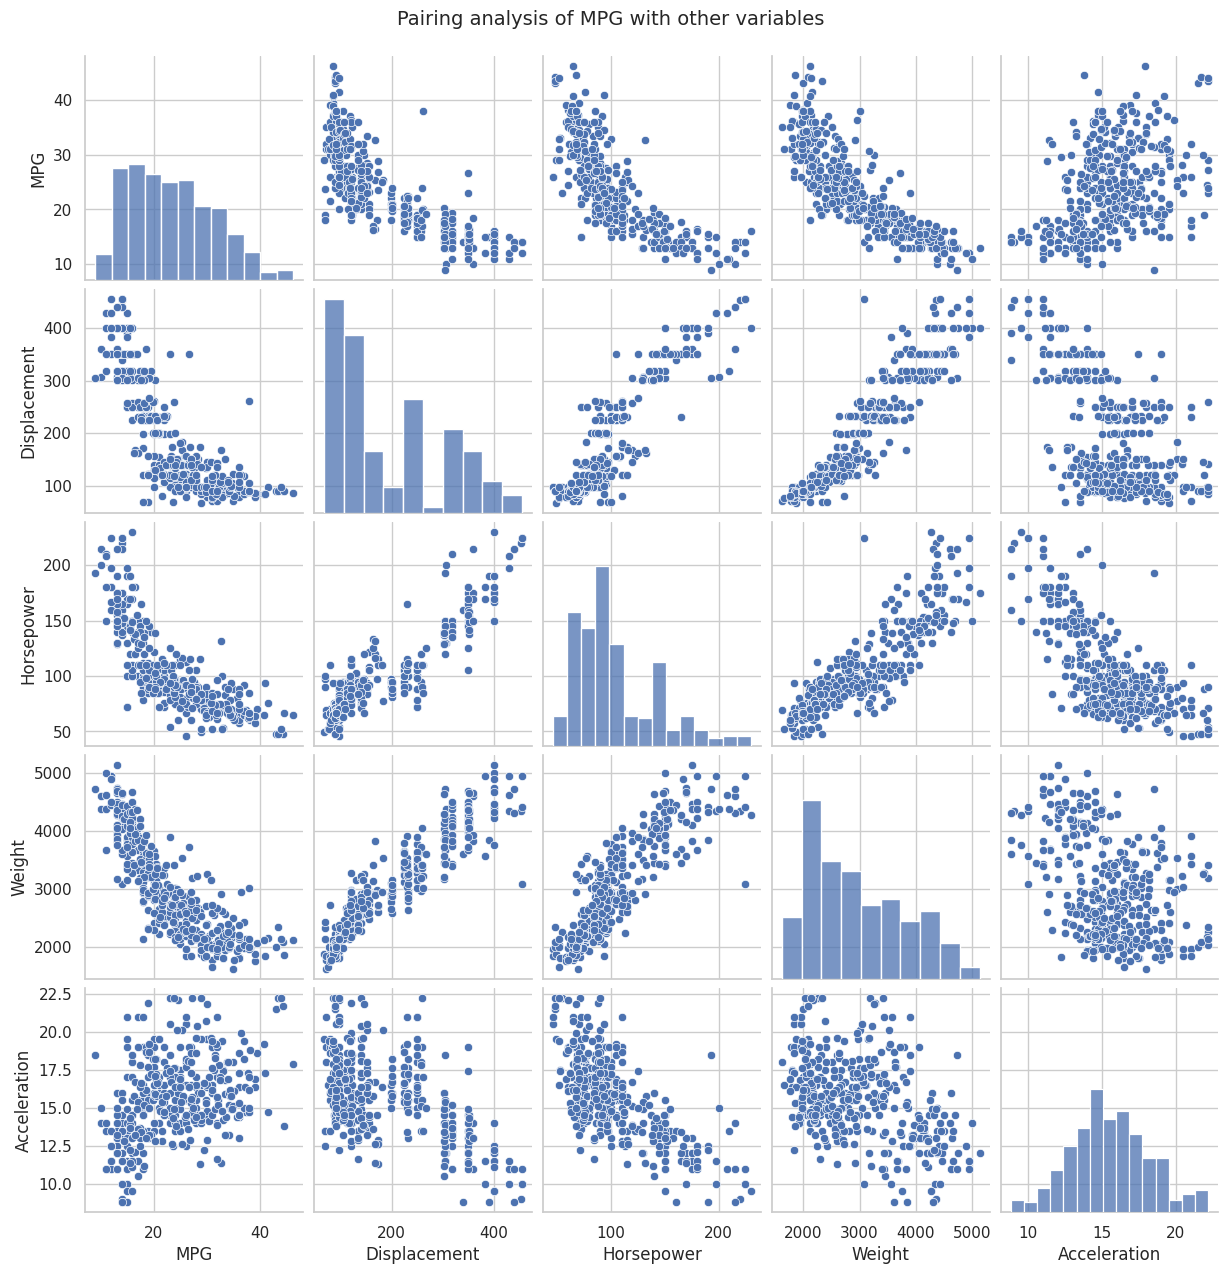

In [48]:
sns.set_style("whitegrid")

# Create pairplot
g = sns.pairplot(df[['MPG', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']])
g.fig.suptitle('Pairing analysis of MPG with other variables ', fontsize=14, y=1.02)
plt.savefig('Pairplot.png')
plt.show()


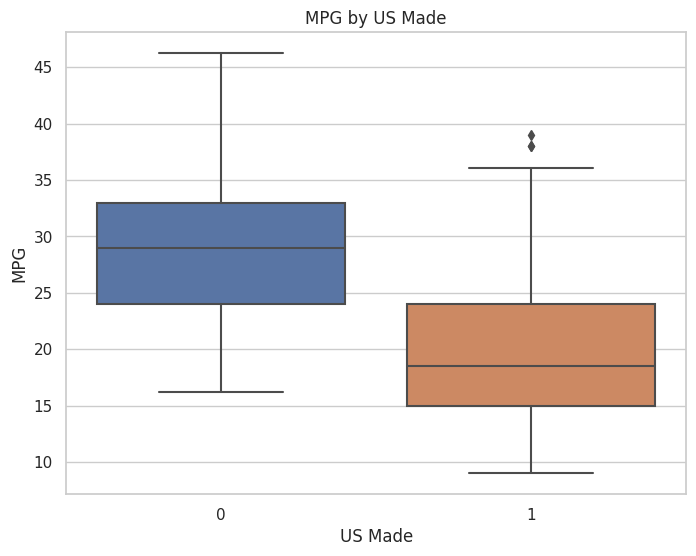

In [24]:
# Graph representing MPG by US MAde distirbution
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.boxplot(x='US Made', y='MPG', data=df)

plt.xlabel('US Made')
plt.ylabel('MPG')
plt.title('MPG by US Made')

plt.show()

Part 2:

Build a linear regression model to accurately predict miles per gallon (MPG) based on the attributes of a vehicle. Discuss the significant attributes and how they can help you build the proper car.

In [25]:
# Checking for multicolinearity using VIF which has to be below 5
X_1 = sm.tools.add_constant(df)
first_series = pd.Series([variance_inflation_factor(X_1.values,i) for i in range(X_1.shape[1])],index=X_1.columns)
print('Series BEFORE feature selection: \n\n{}\n'.format(first_series))

Series BEFORE feature selection: 

const           780.723536
MPG               5.699899
Cylinders        10.717278
Displacement     23.583996
Horsepower        9.516004
Weight           13.712687
Acceleration      2.599685
Model Year        2.037552
US Made           2.104483
dtype: float64



In [26]:
# Identify columns to drop that are highlighly correlated "Weight", "Displacement","Cyclinder"
new_df = df.drop(['Cylinders','Displacement','Weight'],axis=1)

#Checking again for multicolinearity in columns since the VIF has to be below 5
X_2 = sm.tools.add_constant(new_df)
series2 = pd.Series([variance_inflation_factor(X_2.values,i) for i in range(X_2.shape[1])],index=X_2.columns)
print('Series AFTER feature selection: \n\n{}'.format(series2))

Series AFTER feature selection: 

const           703.024241
MPG               4.084876
Horsepower        4.314630
Acceleration      2.089355
Model Year        1.663922
US Made           1.613892
dtype: float64


In [27]:
new_df.columns

Index(['MPG', 'Horsepower', 'Acceleration', 'Model Year', 'US Made'], dtype='object')

In [28]:
# Using dummy encoding methodolofy for tranforming  "US_Made" categorical variable
new_df = pd.get_dummies(new_df, columns=["US Made"])
print(new_df)

      MPG  Horsepower  Acceleration  Model Year  US Made_0  US Made_1
0    18.0       130.0          12.0          70          0          1
1    15.0       165.0          11.5          70          0          1
2    18.0       150.0          11.0          70          0          1
3    16.0       150.0          12.0          70          0          1
4    17.0       140.0          10.5          70          0          1
..    ...         ...           ...         ...        ...        ...
393  27.0        86.0          15.6          82          0          1
394  44.0        52.0          22.2          82          1          0
395  32.0        84.0          11.6          82          0          1
396  28.0        79.0          18.6          82          0          1
397  31.0        82.0          19.4          82          0          1

[398 rows x 6 columns]


In [29]:
# identifying head and tail data distribution and sampling 
new_df.head()

,MPG,Horsepower,Acceleration,Model Year,US Made_0,US Made_1
0,18.0,130.0,12.0,70,0,1
1,15.0,165.0,11.5,70,0,1
2,18.0,150.0,11.0,70,0,1
3,16.0,150.0,12.0,70,0,1
4,17.0,140.0,10.5,70,0,1


In [30]:
# identifying head and tail data distribution and sampling 
new_df.tail()

,MPG,Horsepower,Acceleration,Model Year,US Made_0,US Made_1
393,27.0,86.0,15.6,82,0,1
394,44.0,52.0,22.2,82,1,0
395,32.0,84.0,11.6,82,0,1
396,28.0,79.0,18.6,82,0,1
397,31.0,82.0,19.4,82,0,1


**Model Building**

In [31]:
# Splitting the data into train and test 
X = new_df.drop("MPG", axis=1)
y = new_df["MPG"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

In [32]:
# Scaling the data 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#By scaling the features using MinMaxScaler, the values of the features are transformed to the 0,1 which is beneficial for certain machine learning algorithms that are sensitive to the scale of the input features, ensuring that all features are on a similar scale and preventing some features from dominating others due to their original magnitudes.

In [33]:
# Adding a constant
import statsmodels.api as sm
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

In [34]:
# Conducting a Multivariate linear regression
model = sm.OLS(y_train, X_train_scaled)
results = model.fit()

In [35]:
# Get the original variable names
var_name = X_train.columns.tolist()
var_name.insert(0, "const")

In [36]:
# Converting the  table to DataFrame
results_df = pd.DataFrame({'coef': results.params, 'std_err': results.bse, 't-value': results.tvalues,
                           'p-value': results.pvalues, '95% CI Lower': results.conf_int()[0],
                           '95% CI Upper': results.conf_int()[1]})
results_df.index = var_name  
results_df.index.name = 'Variable'

# Print regression report 
print(results.summary())
print(results_df)

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     204.6
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           7.16e-81
Time:                        04:41:23   Log-Likelihood:                -776.98
No. Observations:                 278   AIC:                             1564.
Df Residuals:                     273   BIC:                             1582.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.8378      0.963     21.649      0.0

Part 3:

Optimize the model using selection techniques, explain whether the model can achieve the specified goals, and describe which attributes contribute to higher MPG over others.



In [37]:
#!pip3 install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
forward_selector = SFS(LinearRegression(),
                        k_features='best',
                        forward=True,
                        scoring='r2',
                        cv=5)
forward_selector.fit(X_train_scaled, y_train)
forward_selected_features = list(X_train.columns[list(forward_selector.k_feature_idx_)])
print("Display Forward Features: ", forward_selected_features)

Display Forward Features:  ['Acceleration', 'Model Year', 'US Made_0', 'US Made_1']


In [38]:
# Conducting step wise feature selection 
stepwise_selector = SFS(LinearRegression(),
                        k_features='best',
                        forward=True,
                        floating=True,
                        scoring='r2',
                        cv=5)
stepwise_selector.fit(X_train_scaled, y_train)
stepwise_selected_features = list(X_train.columns[list(stepwise_selector.k_feature_idx_)])
print("Stepwise Selected Features: ", stepwise_selected_features)

Stepwise Selected Features:  ['Acceleration', 'Model Year', 'US Made_0', 'US Made_1']


In [39]:
# Conducting Sequential Forward Selection and using R2
sfs=SFS(LinearRegression(),
        k_features=5,
        forward=True, 
        floating=False,   
        scoring='r2')

In [40]:
sfs.fit(X,y)
sfs.k_feature_names_

('Horsepower', 'Acceleration', 'Model Year', 'US Made_0', 'US Made_1')

In [41]:
# Using R2 here, as the criterion for conducting Sequential Backward Selection (SFS)
sfs=SFS(LinearRegression(),
        k_features=5,
        forward=False, #This is for Backward Elimination 
        floating=False,   
        scoring='r2')

In [42]:
sfs.fit(X,y)
sfs.k_feature_names_

('Horsepower', 'Acceleration', 'Model Year', 'US Made_0', 'US Made_1')

In [43]:
# Generating model accuracy
from sklearn.metrics import r2_score

y_train_pred = results.predict(X_train_scaled)
y_test_pred = results.predict(X_test_scaled)

overall_model_accuracy = r2_score(y_train, y_train_pred)
print("Overall Model Accuracy: ", overall_model_accuracy)

Overall Model Accuracy:  0.7499076738467606


In [44]:
# Generating model accuracy on the training set
train_model_accuracy = r2_score(y_train, y_train_pred)
print("Model accuracy on the Train Set: ", train_model_accuracy)

Model accuracy on the Train Set:  0.7499076738467606


In [45]:
# Generating model accuracy on the test set
test_model_accuracy = r2_score(y_test, y_test_pred)
print("Model accuracy on the Test Set: ", test_model_accuracy)


Model accuracy on the Test Set:  0.7643674741554809


In [46]:
# Idnetifying the most significant variables 
most_significant_variables = results_df.iloc[1:].sort_values(by='coef', ascending=False).index[:4].tolist()
print("Most Significant Variables: ", most_significant_variables)

Most Significant Variables:  ['US Made_0', 'Model Year', 'US Made_1', 'Acceleration']


In [47]:
# Attributes with Max Positive Coeffcieint 
max_positive_coefficient_variable = results_df[results_df['coef'] == results_df['coef'].max()].index[0]
if max_positive_coefficient_variable == 'const':
    max_positive_coefficient_variable = results_df[results_df['coef'] != results_df['coef'].max()]['coef'].idxmax()
print("Maximum Positive Coefficient Variables: ", max_positive_coefficient_variable)

Maximum Positive Coefficient Variables:  US Made_0
